# Machine Learning `Linear` Regression Startup File

Version  | Date | Author | Notes |
:-------:|:----:|:-------|:-----:|
0.1 |20 July 2023| Ken Dizon | Initial version
1.0 |28 July 2023| Ken Dizon | Alpha


**Objective** Write a startup ML script `Linear` for Regression. The aim is to predict continuous values and plot a best-fit line/curve between the data of x and y. 

### Linear Regression
- Simple: influence of X to predict a continuous numeric Y value
- Multiple: influence of Xs to predict a continuous numeric Y value

______________________
#### Content
1. **Load data**
    * 1.1 Data Exploration
2. **Data Preprocessing**
    * 2.1 Cleaning
    * 2.2 Missing Data
    * 2.3 Scaling
3. **Split - Test & Train**
4. **Model Selection**
5. **Model Training**
5. **Model Evaluation**

### Libraries

In [30]:
## standard Data Science
try:
    import numpy as np #math library
    import scipy #computation
    import scipy.optimize as opt
    import matplotlib.pyplot as plt #visualization
    %matplotlib inline
    import pandas as pd #dataframes
    '''Machine Learning''' 
    # standard libraries
    import sklearn
    from sklearn import preprocessing # standardization of dataset
    from sklearn.model_selection import train_test_split # Split our data 
    from sklearn import metrics # standard evaluation
    '''machine learning library'''
    # Algorithim Linear
    from sklearn import linear_model
    # Metric
    from sklearn.metrics import (mean_absolute_error, # np.mean(np.absolute(predictions - y_test))
                                 mean_squared_error, # np.mean((predictions - y_test) ** 2)
                                 r2_score) # r2_score(y_test, predictions)

    
    print('https://scikit-learn.org/stable/')
    print("Libraries imported successfully!")
except ImportError:
    print("Libraries not installed. Please install it to use this library.")

https://scikit-learn.org/stable/
Libraries imported successfully!


_________
# [1] Load Data

In [2]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01)

In [3]:
# Load
try:
    df = pd.read_csv(filepath)
    print("Data imported successfully!")
except ImportError:
    print("Data not installed. Please Load Data.")
# take a look at the dataset
df.head()

Data imported successfully!


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## 1.1 Data Exploration

In [4]:
# summarize the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [5]:
# Selecting numeric features

#cdf = df[['x1','x2','x3', 'x4]]
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


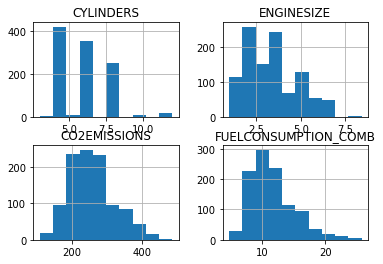

In [6]:
# plot data into histogram
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

#cdf.hist(figsize=(13, 13)) 
#plt.show() 

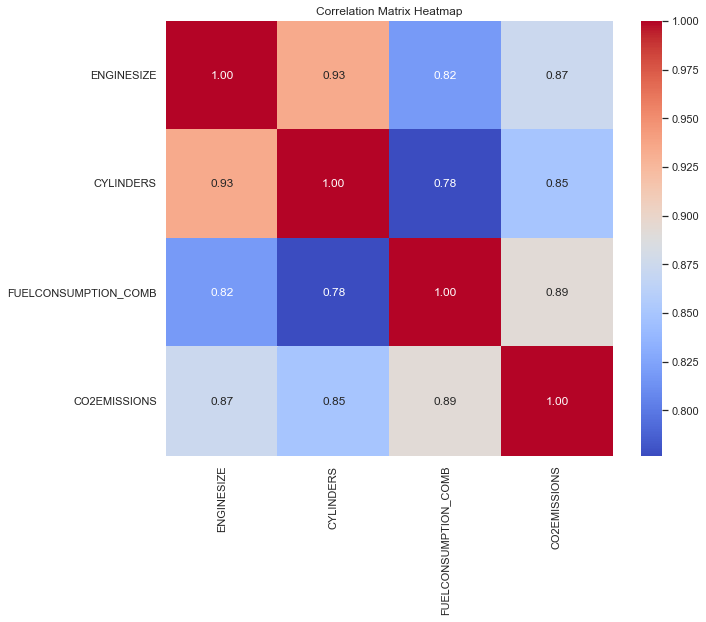

In [7]:
# Create a correlation matrix
import seaborn as sns
sns.set()

correlation_matrix = cdf.corr()
    # Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

There are numerous correlations between differnt variables we will choose an features(X) and a target(Y).

**X vs Y(Emissions)**
- visualize how linear their relationship is:

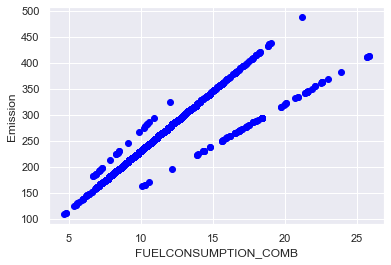

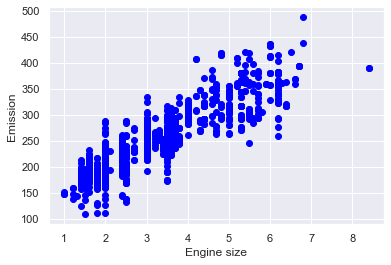

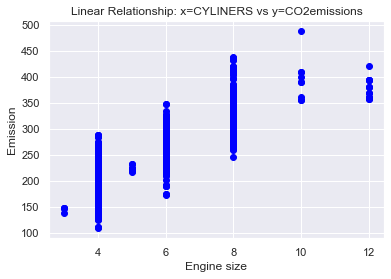

In [8]:
# Linear Relationship 
# x = Features | y = Target 'Emissions'

#plot 2
plt.scatter(cdf.FUELCONSUMPTION_COMB, #x
            cdf.CO2EMISSIONS, #y
            color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

#plot 2
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#plot 3
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title('Linear Relationship: x=CYLINERS vs y=CO2emissions')
plt.show()

_____
# [2] Data Preprocessing 

- Cleaning
- Missing data
- Scaling
- Feature Selection 

**NOTE:** As this is already a refined dataset we skip steps. Feature selection was produced when we selected numeric values from the dataframe.  

> Q: How, many independent variables (X) should we use for the prediction? 

Recommended to avoid using too many independent variables without any theoretical justification may result in an overfit model. An overfit model is too complicated for your data set and not general enough to be used for prediction. Avoid overfitting a model in regression by: _More data, feature selection, regualrization, cross validation (k-fold), ensemble methods, standardize features, hyperparameters_

> Q: Should independent variables be continuous? 

Categorical independent variables can be incorporated into a regression model by converting them into numerical variables. For example: _given a binary variables such as car type, the code dummy zero for manual and one for automatic cars_.


> NOTE: multiple linear regression is a specific type of linear regression. 

There needs to be a linear relationship between the dependent variable and each of your independent variables. There are a number of ways to check for linear relationship. For example: _use scatter plots and then visually checked for linearity. If the relationship displayed in your scatter plot is not linear, then you need to use non-linear regression_

In [9]:
# copy of original data failsafe
df_copy = cdf.copy()

_______________
# [3] Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. `80% of the entire dataset will be used for training and 20% for testing`. We create a mask to select random rows using __np.random.rand()__ function: 

In [10]:
msk = np.random.rand(len(df_copy)) < 0.8
train = df_copy[msk]
test = df_copy[~msk]

In [11]:
print(train.shape)
print(test.shape)

(835, 4)
(232, 4)


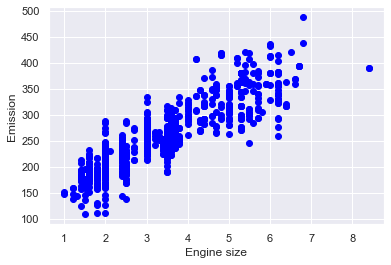

In [12]:
# distribution 
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

_______
# [4] Model Selection

### Simple Linear Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation. 

### Multiple Linear Regression Model
In reality, there are multiple variables that impact the co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.

In [13]:
# Simple LR
slr = linear_model.LinearRegression()

In [14]:
# Multiple LR
mlr = linear_model.LinearRegression()

_______________
# [5] Model Training


In [15]:
# SLR
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
slr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', slr.coef_)
print ('Intercept: ', slr.intercept_)

Coefficients:  [[39.24461743]]
Intercept:  [125.45314976]


Text(0, 0.5, 'Emission')

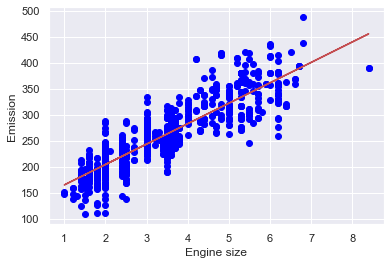

In [16]:
# SLR 
# Plot outputs
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, slr.coef_[0][0]*train_x + slr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
# We can plot the fit line over the data.

In [17]:
# MLR
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
mlr.fit (x, y)

# The coefficients
print ('Coefficients: ', mlr.coef_)

Coefficients:  [[10.20744687  8.68222221  9.2737092 ]]


__Coefficient__ and __Intercept__  are the parameters of the fitted line. 
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
* Solving the model parameters analytically using closed-form equations
* Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

____
# [6] Model Evaluation

In [34]:
# SLR 
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
# predictions
test_y_ = slr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 20.34
Residual sum of squares (MSE): 765.39
R2-score: 0.75


In [32]:
# SLR with packages
SLR_MAE = mean_absolute_error(test_y, test_y_)
SLR_MSE = mean_squared_error(test_y, test_y_)
SLR_R2 = r2_score(test_y, test_y_)

print("Mean absolute error: ", SLR_MAE)
print("Residual sum of squares (MSE): ", SLR_MSE)
print("R2-score: " , SLR_R2)

Mean absolute error:  20.33597311876118
Residual sum of squares (MSE):  765.3938786783692
R2-score:  0.752789556486188


<details><summary>Click here for the Simple Model Evaluation:</summary>
    
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE). 

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [35]:
# MLR
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
# predictions
y_hat= mlr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % mlr.score(x, y))

Mean Absolute Error: 14.26
Residual sum of squares: 375.79
Variance score: 0.88


<details><summary>MLR eplained variance regression score:</summary>
Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, the lower values are worse.

_______
# CHANGE TO FEATURE `x`
use a multiple linear regression with the same dataset, but this time use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?

In [22]:
df2 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'CO2EMISSIONS']]
df2.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,9.9,6.7,196
1,2.4,4,11.2,7.7,221
2,1.5,4,6.0,5.8,136
3,3.5,6,12.7,9.1,255
4,3.5,6,12.1,8.7,244


In [23]:
msk = np.random.rand(len(df)) < 0.8
train = df2[msk]
test = df2[~msk]

In [24]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[10.67271258  7.49971334  5.55041173  4.10106026]]
Residual sum of squares: 641.18
Variance score: 0.85
